<a href="https://colab.research.google.com/github/Kiddie22/brainTumorClassificationSystem/blob/main/figshare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
!pip install mat73
import mat73

In [ ]:
# data_dict = mat73.loadmat('/gdrive/MyDrive/Colab_Notebooks/brainTumorDataPublic_1-766/1.mat')

In [ ]:
item = mat73.loadmat('/content/drive/MyDrive/Colab_Notebooks/brainTumorDataPublic_1-766/1.mat')

In [ ]:
item.items()

dict_items([('cjdata', {'PID': '100360', 'image': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'label': array(1.), 'tumorBorder': array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
       289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
       318.72232305, 249.9600726 , 321.50998185, 237.88021779,
       354.96188748, 234.16333938, 367.97096189, 227.65880218,
       380.9800363 , 210.93284936, 372.61705989, 195.13611615,
       363.32486388, 177.48094374, 350.31578947, 176.55172414,
       336.37749546, 183.98548094, 317.79310345, 196.06533575,
       305.71324864, 207.21597096, 295.49183303, 217.43738657,
       288.98729583, 222.08348457, 273.19056261, 223.94192377,
       268.54446461, 228.58802178]), 'tumorMask': array([[False, False, False, ..., False, False, False],
       [False, False, F

In [ ]:
item.keys()

dict_keys(['cjdata'])

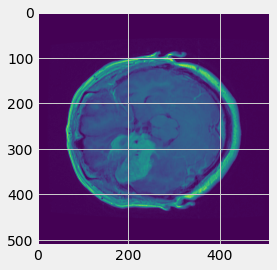

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from PIL import Image

#reading v 7.3 mat file in python
#https://stackoverflow.com/questions/17316880/reading-v-7-3-mat-file-in-python

filepath = '/content/drive/MyDrive/Colab_Notebooks/brainTumorDataPublic_1-766/2.mat';
f = h5py.File(filepath, 'r') #Open mat file for reading

#In MATLAB the data is arranged as follows:
#cjdata is a MATLAB struct
#cjdata.image is a matrix of type int16

#Before update: read only image data.   
####################################################################
#Read cjdata struct, get image member and convert numpy ndarray of type float
#image = np.array(f['cjdata'].get('image')).astype(np.float64) #In MATLAB: image = cjdata.image
#f.close()
####################################################################

#Update: Read all elements of cjdata struct
####################################################################
#Read cjdata struct
cjdata = f['cjdata'] #<HDF5 group "/cjdata" (5 members)>

# In MATLAB cjdata = 
# struct with fields:
#   label: 1
#   PID: '100360'
#   image: [512×512 int16]
#   tumorBorder: [38×1 double]
#   tumorMask: [512×512 logical]

#get image member and convert numpy ndarray of type float
image = np.array(cjdata.get('image')).astype(np.float64) #In MATLAB: image = cjdata.image

label = cjdata.get('label')[0,0] #Use [0,0] indexing in order to convert lable to scalar

PID = cjdata.get('PID') # <HDF5 dataset "PID": shape (6, 1), type "<u2">
PID = ''.join(chr(c) for c in PID) #Convert to string https://stackoverflow.com/questions/12036304/loading-hdf5-matlab-strings-into-python

tumorBorder = np.array(cjdata.get('tumorBorder'))[0] #Use [0] indexing - convert from 2D array to 1D array.

tumorMask = np.array(cjdata.get('tumorMask'))

f.close()
####################################################################

#Convert image to uint8 (before saving as jpeg - jpeg doesn't support int16 format).
#Use simple linear conversion: subtract minimum, and divide by range.
#Note: the conversion is not optimal - you should find a better way.
#Multiply by 255 to set values in uint8 range [0, 255], and covert to type uint8.
hi = np.max(image)
lo = np.min(image)
image = (((image - lo)/(hi-lo))*255).astype(np.uint8)

#Save as jpeg
#https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image
# im = Image.fromarray(image)
# im.save("1.jpg")

#Display image for testing
imgplot = plt.imshow(image)
plt.show()

In [ ]:
filepath = '/content/drive/MyDrive/Colab_Notebooks/brainTumorDataPublic_1-766/2.mat';
f = h5py.File(filepath, 'r')

cjdata = f['cjdata']
image = np.array(cjdata.get('image')).astype(np.float64)
label = cjdata.get('label')[0,0]

PID = cjdata.get('PID')
PID = ''.join(chr(c) for c in PID)

tumorBorder = np.array(cjdata.get('tumorBorder'))[0]
tumorMask = np.array(cjdata.get('tumorMask'))

f.close()

hi = np.max(image)
lo = np.min(image)
image = (((image - lo)/(hi-lo))*255).astype(np.uint8)

imgplot = plt.imshow(image)
plt.show()

In [ ]:
image.shape

(512, 512)

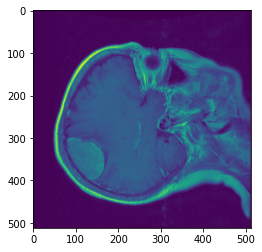

1.0
The tumor type is:  meningioma
For patient: 99308


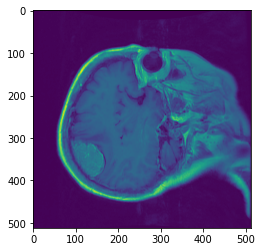

1.0
The tumor type is:  meningioma
For patient: 99308


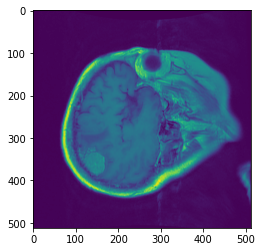

1.0
The tumor type is:  meningioma
For patient: 99308


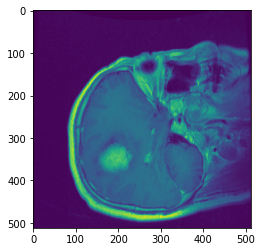

1.0
The tumor type is:  meningioma
For patient: 99815


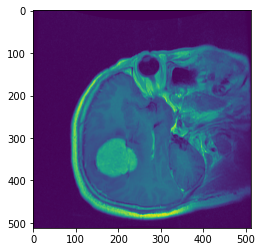

1.0
The tumor type is:  meningioma
For patient: 99815


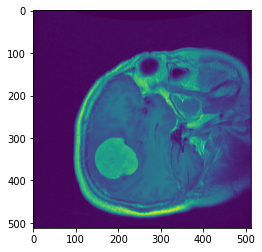

1.0
The tumor type is:  meningioma
For patient: 99815


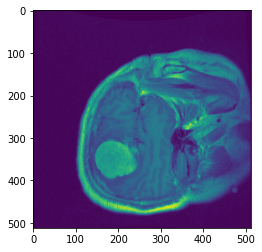

1.0
The tumor type is:  meningioma
For patient: 99815


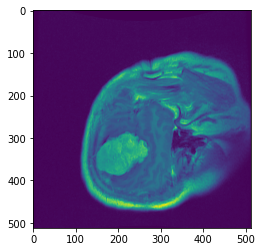

1.0
The tumor type is:  meningioma
For patient: 99815


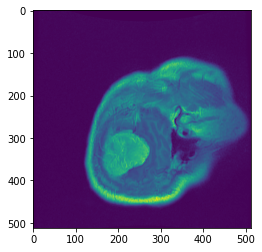

1.0
The tumor type is:  meningioma
For patient: 99815


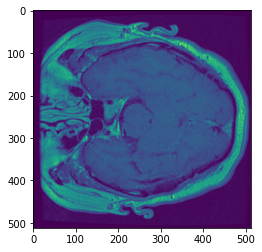

3.0
The tumor type is:  pituitary tumor
For patient: 105936


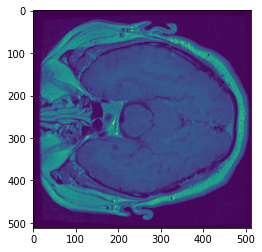

3.0
The tumor type is:  pituitary tumor
For patient: 105936


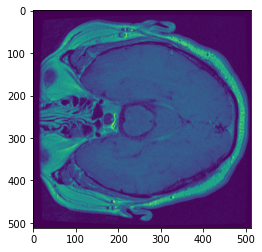

3.0
The tumor type is:  pituitary tumor
For patient: 105936


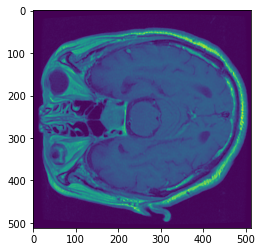

3.0
The tumor type is:  pituitary tumor
For patient: 106062


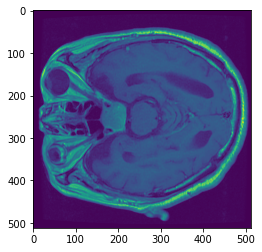

3.0
The tumor type is:  pituitary tumor
For patient: 106062


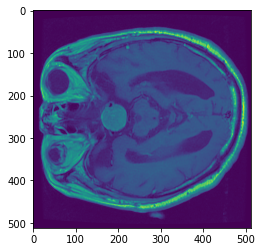

3.0
The tumor type is:  pituitary tumor
For patient: 106062


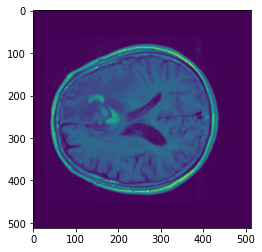

2.0
The tumor type is:  glioma
For patient: 100820


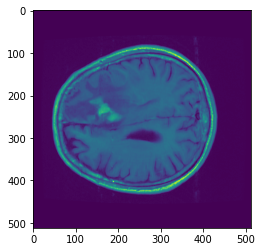

2.0
The tumor type is:  glioma
For patient: 100820


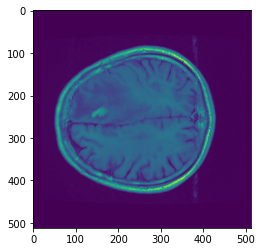

2.0
The tumor type is:  glioma
For patient: 100820


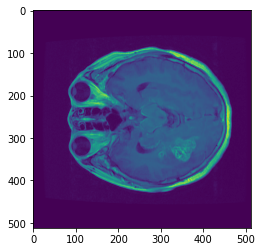

2.0
The tumor type is:  glioma
For patient: 101020


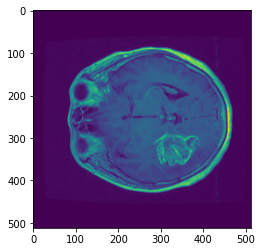

2.0
The tumor type is:  glioma
For patient: 101020


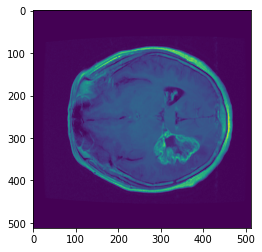

2.0
The tumor type is:  glioma
For patient: 101020


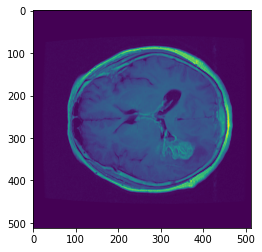

2.0
The tumor type is:  glioma
For patient: 101020


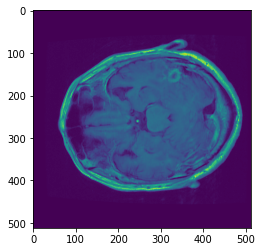

2.0
The tumor type is:  glioma
For patient: 102075


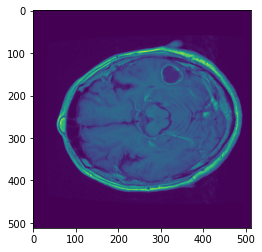

2.0
The tumor type is:  glioma
For patient: 102075


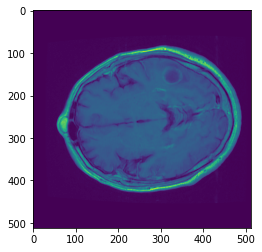

2.0
The tumor type is:  glioma
For patient: 102075


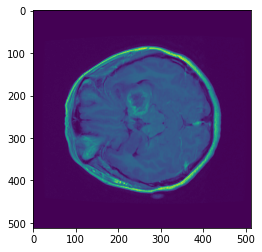

2.0
The tumor type is:  glioma
For patient: 103148


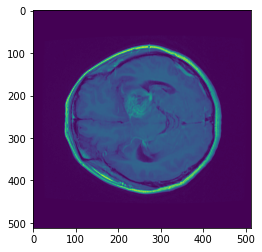

2.0
The tumor type is:  glioma
For patient: 103148


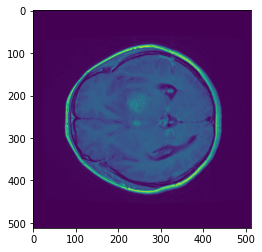

2.0
The tumor type is:  glioma
For patient: 103148


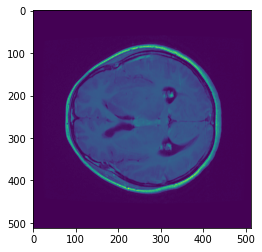

2.0
The tumor type is:  glioma
For patient: 103148


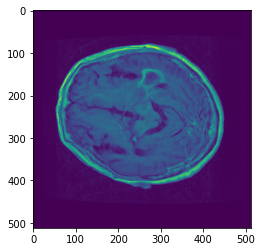

2.0
The tumor type is:  glioma
For patient: 106494


In [2]:
from os import path
import os
from matplotlib import pyplot as plt
import numpy as np
import h5py
from PIL import Image
import re
import sys
from glob import glob


# dir_path = path.dirname(path.abspath('/content/drive/MyDrive/Colab_Notebooks/brainTumorDataPublic_1-766/'))
# path_to_mat_files = path.join(dir_path, "*.mat")
# found_files = glob(path_to_mat_files, recursive=True)
# total_files = 0

def convert_to_png(file: str):
  f = h5py.File(file, 'r')

  cjdata = f['cjdata']
  image = np.array(cjdata.get('image')).astype(np.float64)
  label = cjdata.get('label')[0,0]
  PID = cjdata.get('PID')
  PID = ''.join(chr(c) for c in PID)

  tumorBorder = np.array(cjdata.get('tumorBorder'))[0]
  tumorMask = np.array(cjdata.get('tumorMask'))

  f.close()

  hi = np.max(image)
  lo = np.min(image)
  image = (((image - lo)/(hi-lo))*255).astype(np.uint8)

  imgplot = plt.imshow(image)
  plt.show()
  print(label)
  
  classification = ['', 'meningioma', 'glioma', 'pituitary tumor']
  print('The tumor type is: ', classification[label.astype(np.int32)])
  print('For patient:', PID)
        
for x in range(700, 730):
  filePathToImg = '/content/drive/MyDrive/Colab_Notebooks/brainTumorDataPublic_1-766/' + str(x) + '.mat'
  convert_to_png(filePathToImg)




